In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10.0, 10.0/golden))

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

# PULIZIA DATI
distance_cond = tragitti[distance_param] != 0
moovit_cond = tragitti['Public'] > 12
public_cond = tragitti['Public'] != 0
bike_cond = tragitti['Bike'] != 0
foot_cond = tragitti['Foot'] != 0
car_cond = tragitti['Car'] != 0
car2go_cond = tragitti['Car2Go'] != 0
enjoy_cond = tragitti['Enjoy'] != 0
coherence_cond = (tragitti['Car'] <= tragitti['Car2Go']) & (tragitti['Car'] <= tragitti['Enjoy'])
cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond

In [2]:
tragitti = tragitti[moovit_cond & bike_cond & foot_cond & car_cond & enjoy_cond & coherence_cond & (tragitti['FDistance'] >= 2.)]
public_batte_car = tragitti[tragitti['Public'] <= tragitti['Enjoy']][['FDistance', 'Month', 'Day', 'Hour', 'Minute', 'Public', 'Car']]
len(public_batte_car)

4194

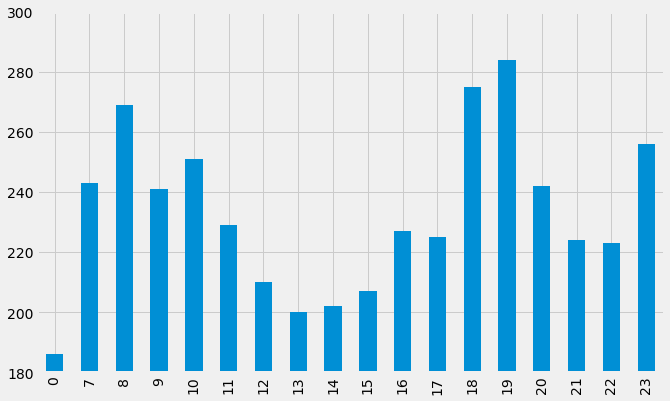

In [3]:
public_batte_car['Hour'].value_counts().sort_index().plot.bar()
plt.ylim(180, 300)
plt.show()

In [4]:
p1 = pd.crosstab(
    index=pd.cut(public_batte_car['FDistance'], bins=[0., 3., 6., 10.]),
    columns='Abs. frequence')

In [5]:
p2 = pd.crosstab(
    index=pd.cut(tragitti['FDistance'], bins=[0., 3., 6., 10.]),
    columns='Abs. frequence')

In [6]:
(p1 / p2).apply(lambda e: np.round(e*100, 2))

col_0,Abs. frequence
FDistance,
"(0.0, 3.0]",13.45
"(3.0, 6.0]",8.04
"(6.0, 10.0]",5.82
